<a href="https://colab.research.google.com/github/paulo-santos-ds/Machine-Learning/blob/main/Baby_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('/content/iris.csv', sep=';', decimal=',')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Primeiro modelo

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
clf = DecisionTreeClassifier(random_state = 32)

In [102]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)']
label = 'target_names'

In [103]:
clf.fit(X = df[cols], y = df[label])

DecisionTreeClassifier(random_state=32)

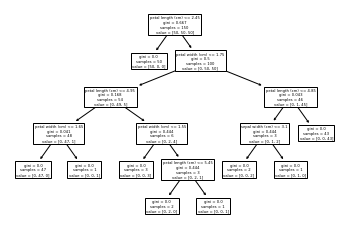

In [104]:
from sklearn import tree
tree.plot_tree(clf,feature_names=cols)
plt.show()

In [105]:
df['previsao'] = clf.predict(df[cols])

sum(df['previsao']==df['target_names'])/df.shape[0]

1.0

## Segmentando em treino e teste

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df[cols].values, df[label].values, 
                                                    test_size=0.33, random_state=42)

#### Sempre antes de treinar segmentar a base em treino e teste ou trieno, teste e validação

In [108]:
clf = DecisionTreeClassifier(random_state = 32)
clf.fit(X = X_train, y = y_train)

DecisionTreeClassifier(random_state=32)

In [109]:
prev = clf.predict(X_test)

sum(prev==y_test)/len(y_test)

0.98

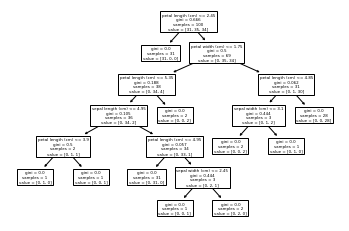

In [110]:
tree.plot_tree(clf,feature_names=cols)
plt.show()

### Controlando a altura/profundidade da árvore

In [111]:
clf = DecisionTreeClassifier(random_state = 32, max_depth=2)
clf.fit(X = X_train, y = y_train)

DecisionTreeClassifier(max_depth=2, random_state=32)

In [112]:
prev = clf.predict(X_test)

sum(prev==y_test)/len(y_test)

0.98

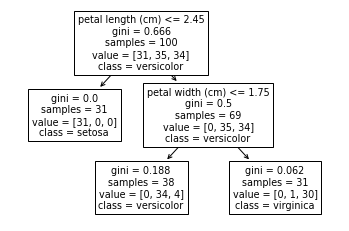

In [113]:
tree.plot_tree(clf,feature_names=cols, class_names=df['target_names'].unique())
plt.show()

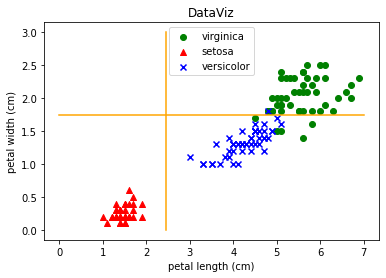

In [114]:
coly = 'petal width (cm)'
colx = 'petal length (cm)'

flag = df['target_names'] == 'virginica'
plt.scatter(df[flag][colx], df[flag][coly], color = 'green', marker = 'o', label = 'virginica')

flag = df['target_names'] == 'setosa'
plt.scatter(df[flag][colx], df[flag][coly], color = 'red', marker = '^', label = 'setosa')

flag = df['target_names'] == 'versicolor'
plt.scatter(df[flag][colx], df[flag][coly], color = 'blue', marker = 'x', label = 'versicolor')

eixox = [2.45, 2.45]
eixoy = [0,3]
plt.plot(eixox, eixoy, color = 'orange')

eixox = [0,7]
eixoy = [1.75,1.75]
plt.plot(eixox, eixoy, color = 'orange')

plt.xlabel(colx)
plt.ylabel(coly)
plt.legend(loc = 'upper center')
plt.title('DataViz')
#plt.grid()

plt.show()

## Next Level

In [115]:
from sklearn.datasets import load_wine

In [116]:
data = load_wine()
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df['target'] = 'class_'+df['target'].astype(str)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [117]:
df.shape

(178, 14)

In [118]:
cols = df.columns.drop('target')
label = 'target'

X_train, X_test, y_train, y_test = train_test_split(df[cols].values, df[label].values, 
                                                    test_size=0.33, random_state=42)

In [119]:
clf = DecisionTreeClassifier(random_state = 32, max_depth=3)
clf.fit(X = X_train, y = y_train)

DecisionTreeClassifier(max_depth=3, random_state=32)

In [120]:
prev = clf.predict(X_test)

sum(prev==y_test)/len(y_test)

0.9661016949152542

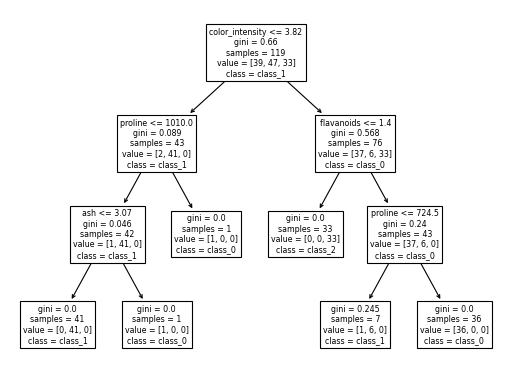

In [121]:
plt.figure(figsize=(8, 6), dpi=80)
tree.plot_tree(clf,feature_names=cols, class_names=df[label].unique())
plt.show()

## Feature Engineering

In [122]:
genero = [] 
np.random.seed(32)
for i in np.random.randint(0,2,10):
    if i ==1:
        genero.append('M')
    else:
        genero.append('F')
genero

['M', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'M']

### Features categóricas

Feature com 3 ou mais elementos distintos -> vai ser cada feature vira uma coluna

Feature com apenas 2 elementos distintos -> pode cada um virar uma coluna ou ser uma coluna única, no caso deles serem mutuamente excludentes

#### Outro ponto importante
Quando estamos transformando features categóricas em várias colunas, chamamos isso de one hot encoding ou criar dummies. Precisa sempre pensar no problema, ganhar mais informação (criar mais colunas) e ter problema de dimenssionalidade ou ter menos informação (menos colunas) e não ter problema de dimenssionalidade.

##### OBS: Sempre controlar o número de colunas, não se reduz quantidade de linhas

In [123]:
pd.get_dummies(df['target']) ## exemplo -- lembrar que o label não é feature e não faria sentido

,class_0,class_1,class_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [124]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['uva', 'pera', 'pera', 'banana', 'banana', 'uva', 'banana', 'pera'])

LabelEncoder()

In [125]:
le.classes_

array(['banana', 'pera', 'uva'], dtype='<U6')

In [126]:
le.transform(['uva', 'pera', 'pera', 'banana', 'banana', 'uva', 'banana', 'pera'])

array([2, 1, 1, 0, 0, 2, 0, 1])

In [127]:
le.inverse_transform([2])

array(['uva'], dtype='<U6')